# Qiskit and IBMQ 

In the code below I import the necessary libraries and the IBMQ token. For more information about IBMQ go here https://www.ibm.com/quantum-computing/ For information about downloading Qiskit go here https://qiskit.org/documentation/install.html

In [1]:
import qiskit as q
from qiskit import(
  QuantumCircuit,
  execute)
from qiskit import IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.exceptions import CircuitError
%matplotlib inline
IBMQ.save_account(open("tokenOrKey.txt",'r').read())

Credentials already present. Set overwrite=True to overwrite.


In [2]:
IBMQ.load_account()

C:\Users\Wallach Kids\Anaconda3\lib\site-packages\qiskit\providers\models\backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

Here I used the Hadamard gate (h gate) and Ry gates. The job of the H gate is rotates the states |0⟩ and |1⟩ to |+⟩ and |−⟩. The Ry gate rotates the qibit state around the y axis.

In [4]:
circuit=q.QuantumCircuit(2,2)

circuit.h(0)

circuit.ry(0,1)

circuit.measure([0,1],[0,1])
circuit.draw()

The code below is used as a guide to see what Quantum Computers are avalable

In [5]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 8 queued and 5 qubits
ibmq_16_melbourne has 5 queued and 15 qubits
ibmq_vigo has 2 queued and 5 qubits
ibmq_ourense has 16 queued and 5 qubits
ibmq_london has 4 queued and 5 qubits
ibmq_burlington has 2 queued and 5 qubits
ibmq_essex has 4 queued and 5 qubits
ibmq_armonk has 13 queued and 1 qubits


In [7]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_16_melbourne")
job=q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


The code below graphs the possible states.
The output of this might change because of noise. Another thing that also effect preformance is change in temperature.

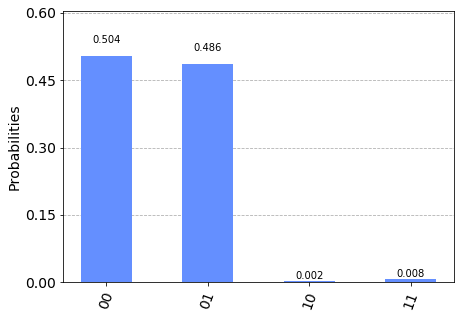

In [8]:
from qiskit.tools.visualization import plot_histogram
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])